In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [62]:
data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [63]:
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [64]:
data.shape

(398, 8)

In [65]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [66]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [67]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [68]:
data = data[data.horsepower != '?']
print('?' in data.horsepower)
data.shape
data.dtypes

False


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [69]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [70]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [71]:
data.mpg.describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Density'>

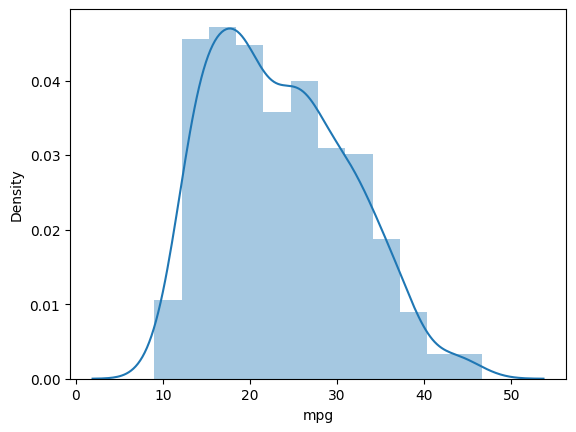

In [72]:
sns.distplot(data['mpg'])

In [73]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [74]:
data_scale = data.copy()
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [75]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [76]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [77]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


In [78]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1,USA
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2,Europe
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1,USA
ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1,USA
chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,1,USA


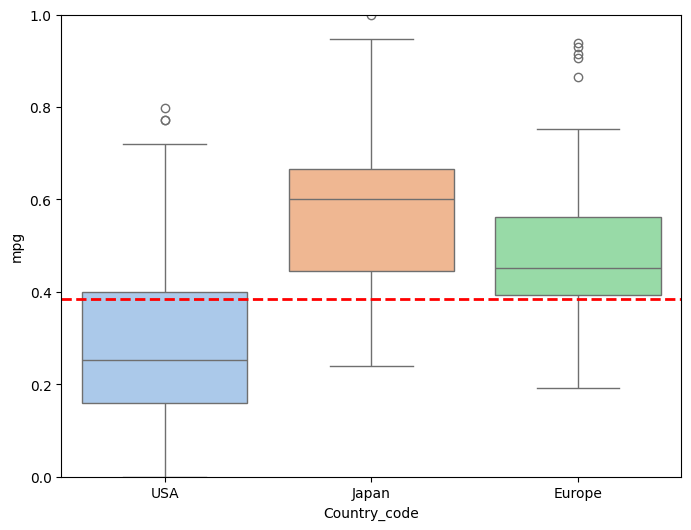

In [79]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette= "pastel")
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

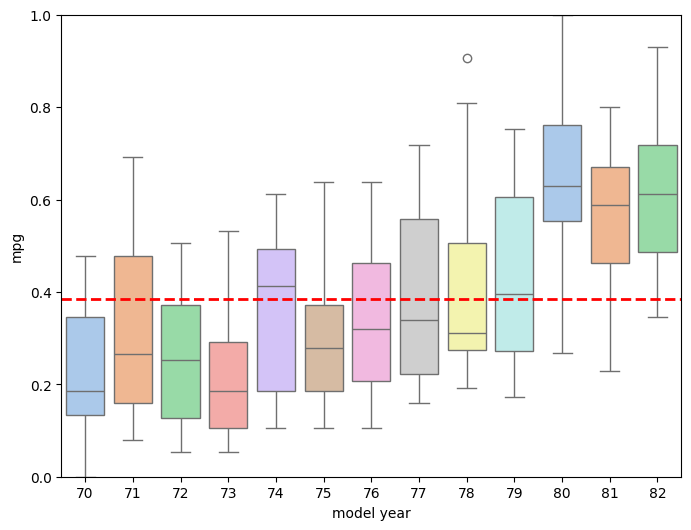

In [80]:
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette="pastel")
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

Done Through Class --> Below is Homework

Build a boxplot chart for MPG by year(DONE) --> Above
Build a boxplot chart for MPG by manufacturer(WIP)
Build a boxplot chart for MPG by origin (USA, Europe, and Japan) (DONE) 
Use scatterplots to look for relationships between displacement, weight, and mpg(WIP)
Pose two questions of your own and make the charts to try to help answer the questions.


In [81]:
data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=392)

In [82]:
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru', 'subaru dl', 'subaru dl', 'subaru'], dtype='object', name='car name')

In [83]:
data['Company_Name'] = data.index.str.extract('(^.*?)\s')

In [84]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')


ValueError: List of boxplot statistics and `positions` values must have same the length

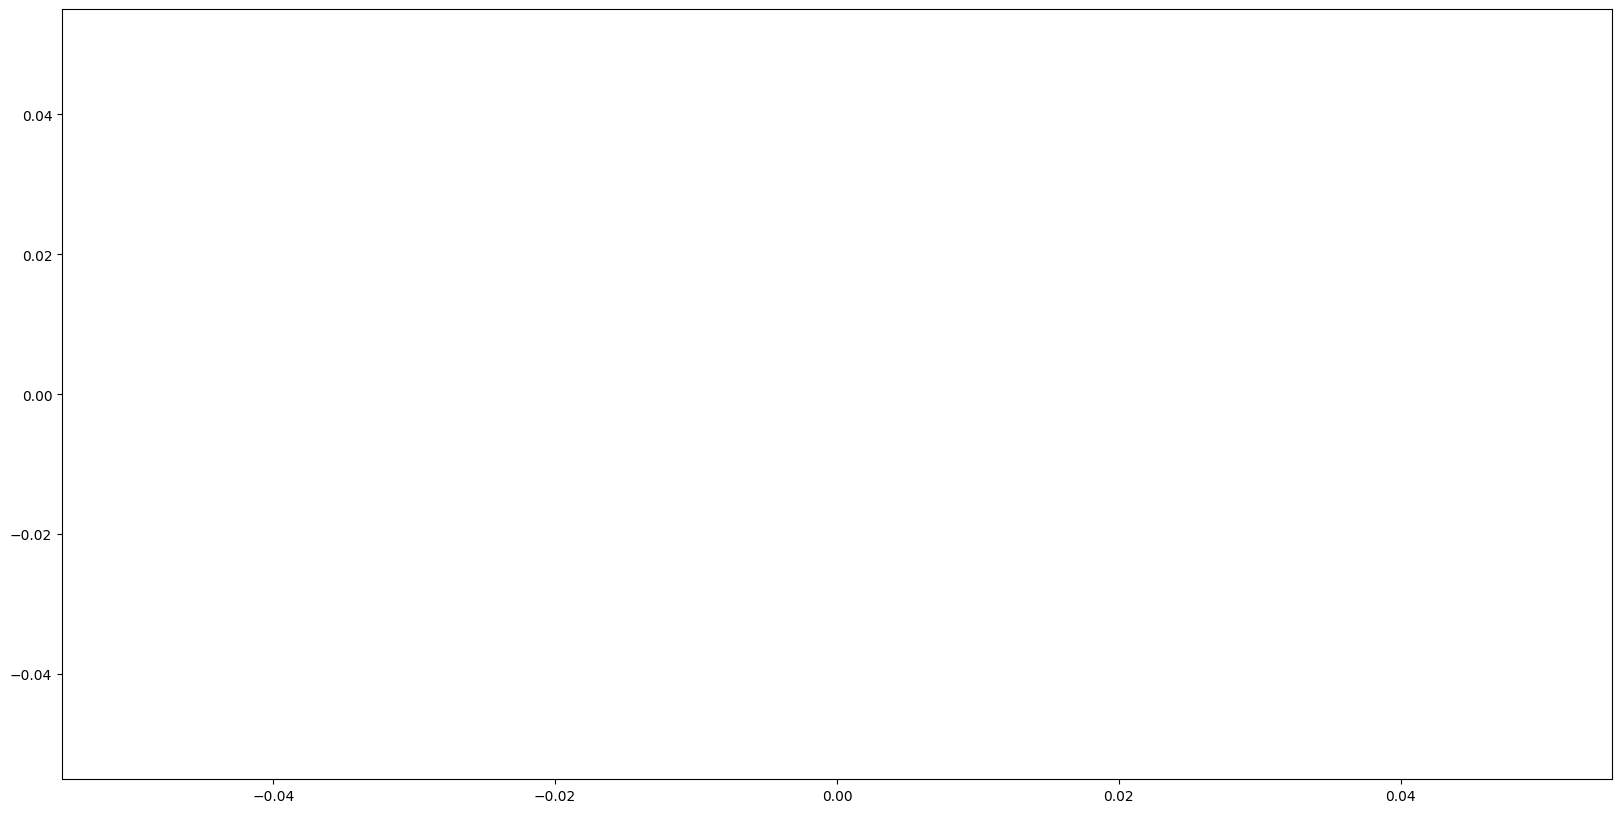

In [111]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels())
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

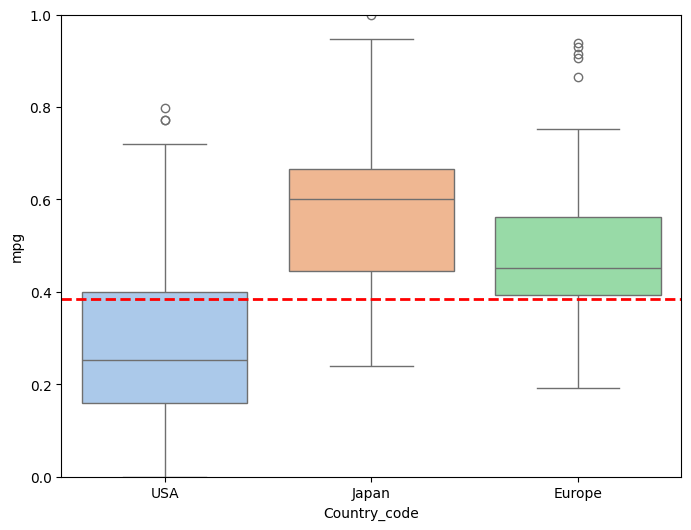

In [86]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette = 'pastel')
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

Box Plot for: MPG for Countries/origin 

In [96]:
data.Company_Name.isnull().any()

True

In [97]:
var='mpg'
data[data[var]== data[var].min()]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,NaN


In [98]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,NaN


In [99]:
var='displacement'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,NaN


In [100]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,NaN
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,NaN
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,NaN


In [101]:
var='weight'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,NaN


In [102]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,NaN


SCATTER PLOT FOR DISPLACEMENT

SCATTER PLOT FOR WEIGHT
SCATTER PLOT FOR MPG

In [110]:
var = 'mpg'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [104]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [103]:
var = 'displacement'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

Question 1)
    Which Country would be best to get a car from in terms of MPG and Weight if I were looking to get a car that was roughly aroung 3500 lbs?

+Using the Weight scatter plot, you can see that the best car to get would be a European car, if you were searching for a 3500 lbs car that has a decent MPG. While 20 MPG isn't the best, Japan's cars at 3500 lbs are at about 27 MPG while USA's is at 29 MPG. 

Question 2) '
    Which car companies are, on average, at OR over 0.6 MPG?
Datsun, Mazda, and Honda are on average about 0.6 MPG compared to the other car companies, as demonstrated by the Company box plot of all the Car companies and their MPGs.